In [1]:
import numpy as np
from tcc_markov_chain.systems import HDPeriodic
from tcc_markov_chain.simulations import MarkovChain, PeriodicDirectSampling
from copy import deepcopy

2025-07-15 18:30:26,772 - INFO - creting system with 2 particles of radii 1
2025-07-15 18:30:26,772 - INFO - density: 0.06283185307179587, box size 10
2025-07-15 18:30:26,774 - INFO - system created


[[1. 1.]
 [9. 9.]]
HardDiskSystem with 2 particles of radius 1
Box size: 10



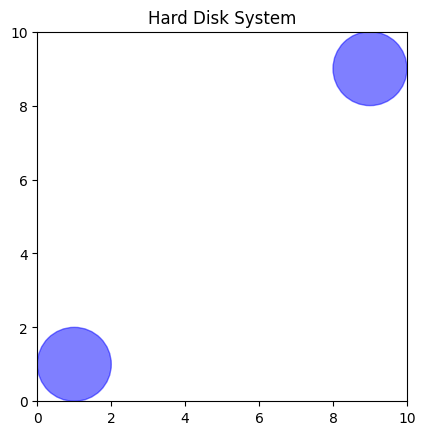

In [2]:
test_pos = np.array([[1,1],[9,9]],dtype=float)
n_particles = test_pos.shape[0]
box_size=10
particle_radius=1
print(test_pos)
sys = HDPeriodic(
    box_size=box_size,
    n_particles=n_particles,
    particle_radius=particle_radius,
)
sys.set_positions(test_pos)
print(sys)
sys.plot_system()

In [3]:
sim = PeriodicDirectSampling(system=deepcopy(sys))

100%|██████████| 5/5 [00:00<00:00, 1569.61it/s]

1
1
1
1
1


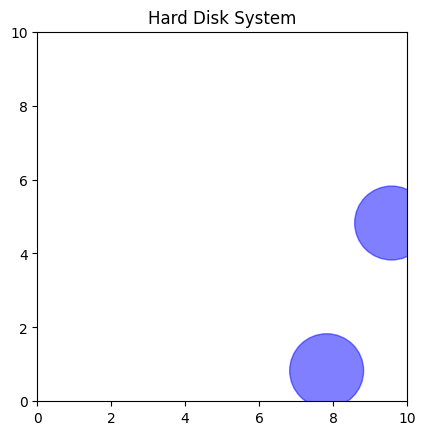

In [9]:
def test_run(sim):
    return 1
sim_run = sim.run(
    eval_fn=test_run,
    n_steps=5 
)
for step in sim_run:
    print(step)

sim.system.plot_system()